<a href="https://colab.research.google.com/github/DS-DesignSyohei/portforio/blob/main/LightGBM_r2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#データ解析用ライブラリ
import pandas as pd
import numpy as np

#データ可視化ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns

#LightGBMライブラリ
import lightgbm as lgb

#訓練データとモデル評価用データに分けるライブラリ
from sklearn.model_selection import train_test_split

#評価関数用ライブラリ
from sklearn.metrics import mean_squared_error


In [11]:
data = pd.read_csv('/content/drive/MyDrive/DS/LightGBM/lightgbm.csv', index_col=0, parse_dates=True)
data = pd.get_dummies(data)

In [12]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=4)

In [13]:
print(len(train_set))
print(len(test_set))

1314
329


In [14]:
#訓練データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_train = train_set.drop('visitor', axis=1)
y_train = train_set['visitor']

#モデル評価用データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_test = test_set.drop('visitor', axis=1)
y_test = test_set['visitor']

In [15]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

In [28]:
params = {'metric': 'rmse',
          'max_depth' : 5
          #'objective': 'regression',  # 最小化させるべき損失関数
          #'random_state': 42,  # 乱数シード
          #'boosting_type': 'gbdt',  # boosting_type
          #'verbose': -1  # これを指定しないと`No further splits with positive gain, best gain: -inf`というWarningが表示される
          }
verbose_eval =1  # この数字を1にすると学習時のスコア推移がコマンドライン表示される

In [29]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                callbacks=[lgb.early_stopping(stopping_rounds=100,
                                              verbose=True),
                           lgb.log_evaluation(verbose_eval)]
)

# スコア(RMSE)算出
y_pred = gbm.predict(X_test)
score = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print(f'RMSE={score}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 18
[LightGBM] [Info] Start training from score 770.709285
[LightGB

In [30]:
predicted = gbm.predict(X_test)

In [31]:
#関数の処理で必要なライブラリ
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#予測値と正解値を描写する関数
def True_Pred_map(pred_df):
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    R2 = r2_score(pred_df['true'], pred_df['pred'])
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [32]:
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']

In [33]:
pred_df.head()

,true,pred
0,184,982.645081
1,513,527.471137
2,1830,1072.396647
3,444,538.159823
4,401,478.532461


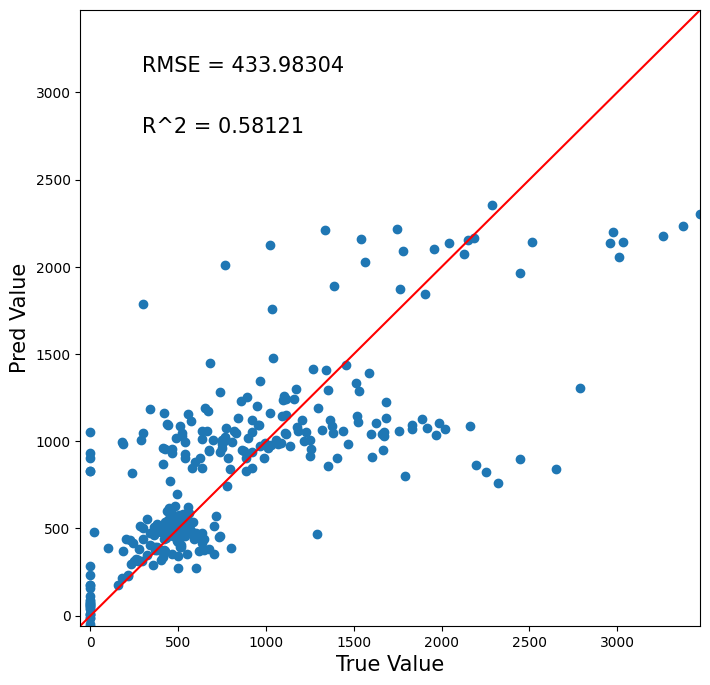

In [34]:
True_Pred_map(pred_df)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22303 (\N{CJK UNIFIED IDEOGRAPH-57

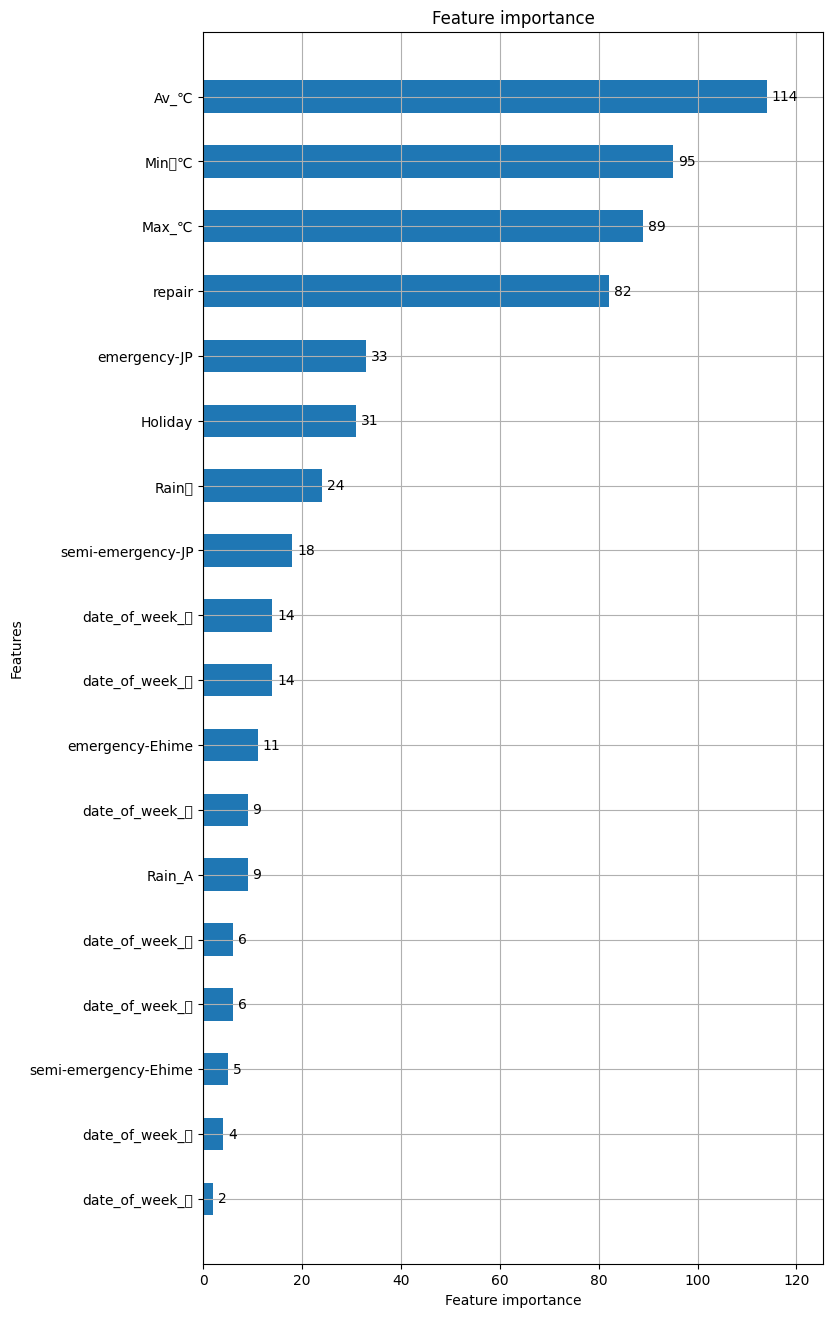

In [35]:
lgb.plot_importance(gbm, height=0.5, figsize=(8,16))

In [ ]:
RMSE_list = []
count = []
for i in range(1, 15):
    params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth' : i}

    gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                callbacks=[lgb.early_stopping(stopping_rounds=100,
                                              verbose=True),
                           lgb.log_evaluation(verbose_eval)]
)

    predicted = gbm.predict(X_test)
    pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
    pred_df.columns = ['true', 'pred']
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    RMSE_list.append(RMSE)
    count.append(i)

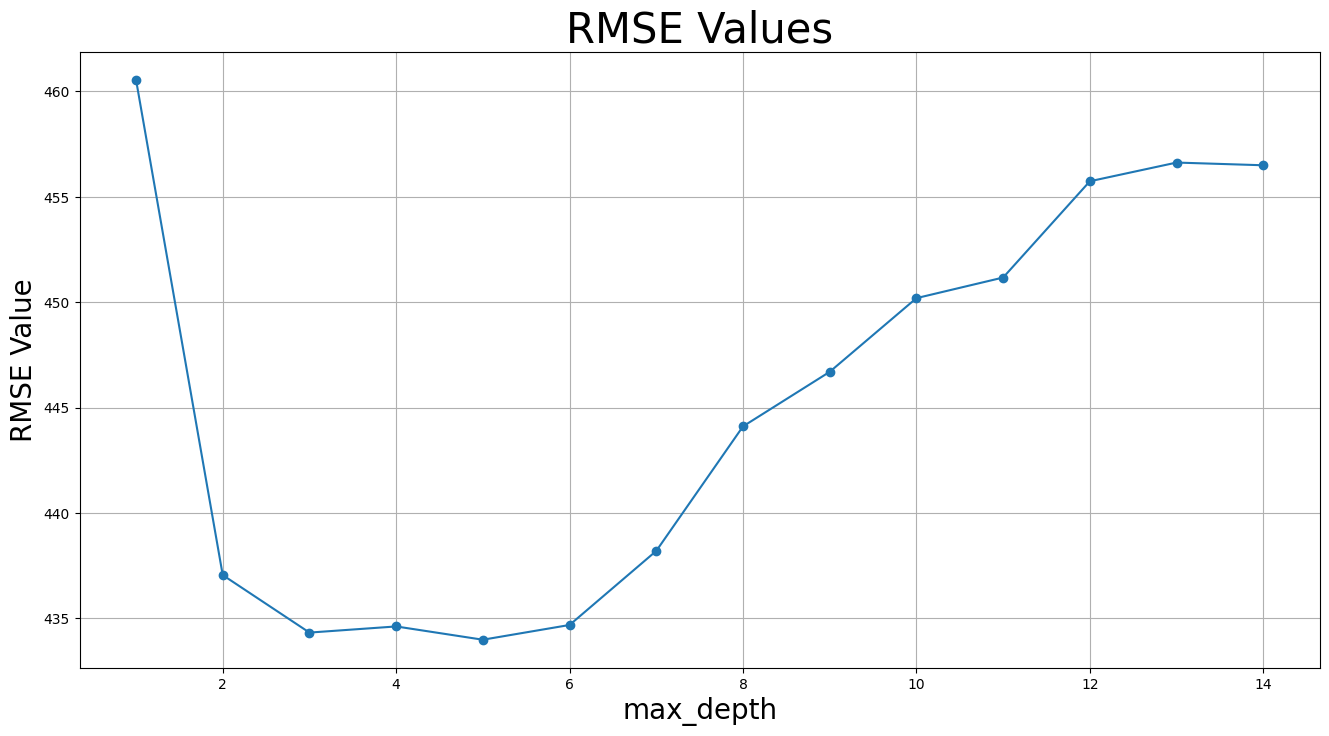

In [37]:
plt.figure(figsize=(16,8))
plt.plot(count, RMSE_list, marker="o")
plt.title("RMSE Values", fontsize=30)
plt.xlabel("max_depth", fontsize=20)
plt.ylabel("RMSE Value", fontsize=20)
plt.grid(True)

In [ ]:
#特徴量の改善が必要